* **dataset** https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset
* **some references**: https://medium.com/@davemason_34760/machine-learning-regression-and-data-analysis-with-the-boston-housing-dataset-in-python-part-2-da589b905cc3

* **Kaggle kernel** https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/notebook?fbclid=IwAR1tUhsklsmFTAW4odModNHzHjiJEOwFcSKteB5Qw5LgtIJPlWcVLA-0p7U
* **ridge method** https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
* **superviesed learning** https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
* **feature selection** https://scikit-learn.org/stable/modules/feature_selection.html

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
#to remove features with low variance
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [2]:
#load data
df_train=pd.read_csv('Boston_housing/train.csv')
df_test=pd.read_csv('Boston_housing/test.csv')
df_sub=pd.read_csv('Boston_housing/submission_example.csv')

In [74]:
df_train

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [19]:
df_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)- **categorical**
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

## 1. Exploratory Data Analysis

In [20]:
df_train['chas'].unique()

array([0, 1], dtype=int64)

In [21]:
correlation=df_train.corr()

In [22]:
correlation

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


In [23]:
correlation["medv"].sort_values(ascending = False)

medv       1.000000
rm         0.689598
zn         0.344842
black      0.336660
dis        0.249422
chas       0.204390
ID        -0.221694
rad       -0.352251
age       -0.358888
crim      -0.407454
nox       -0.413054
tax       -0.448078
indus     -0.473932
ptratio   -0.481376
lstat     -0.738600
Name: medv, dtype: float64

<AxesSubplot:>

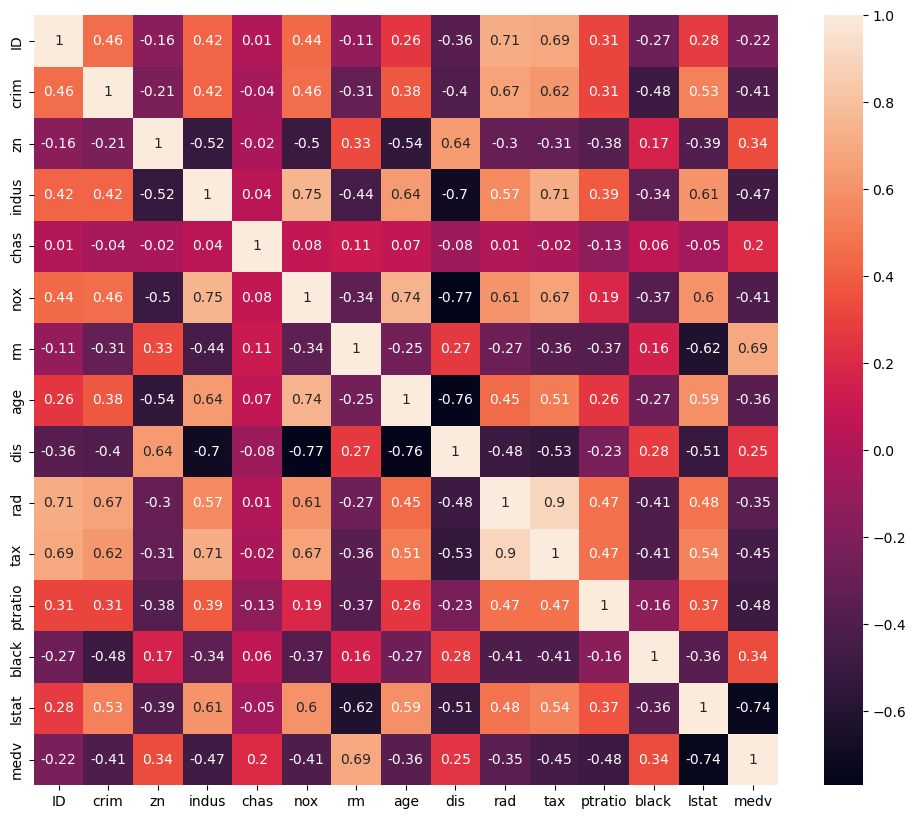

In [4]:
# visualize heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

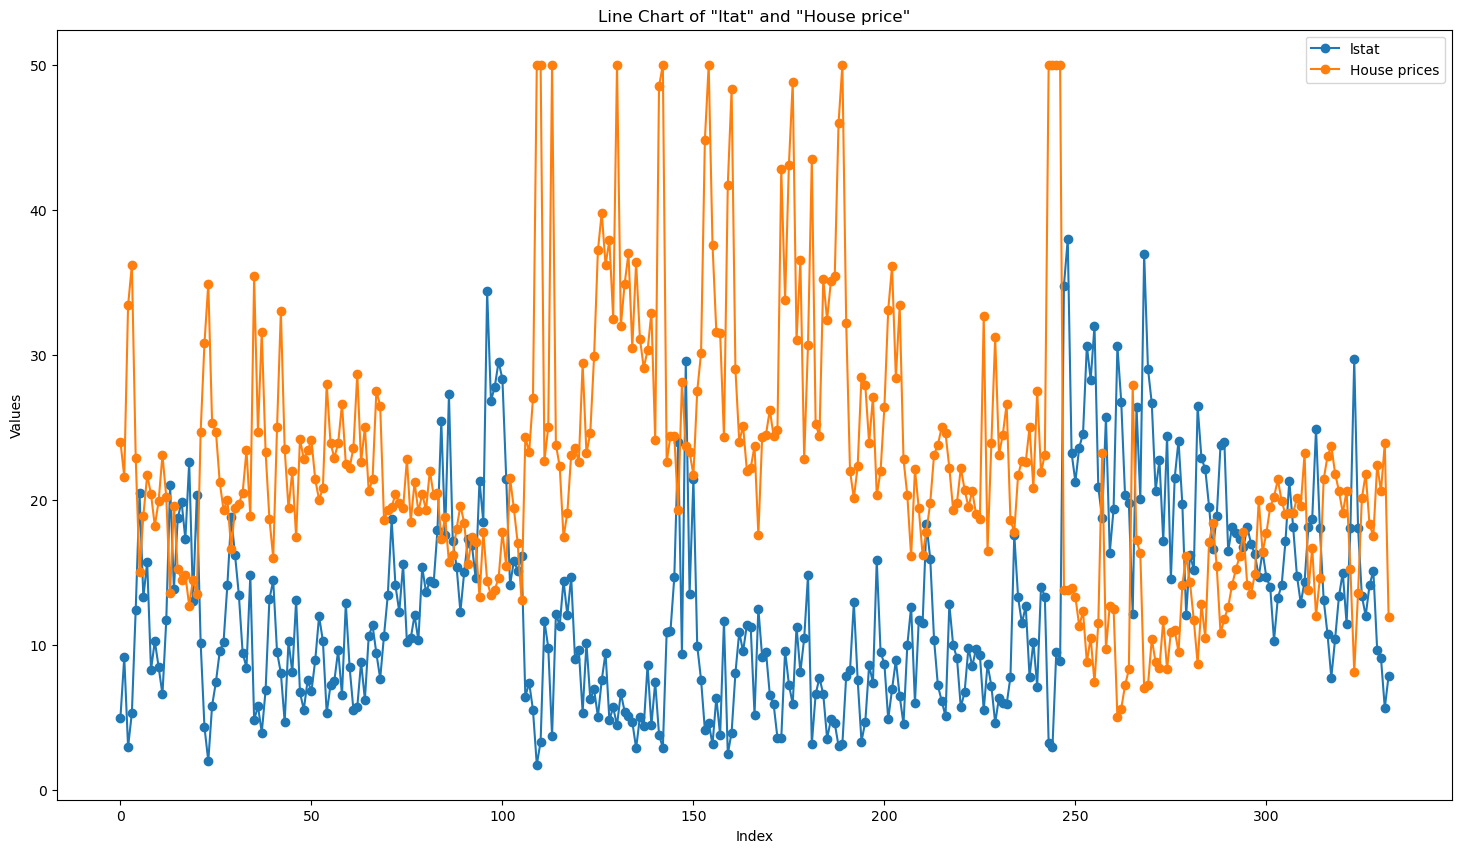

In [14]:
plt.figure(figsize=(18,10))
# Assuming df has columns 'stat' and 'price'
y1_values = df_train['lstat']
y2_values = df_train['medv']

# Plotting the first line
plt.plot(y1_values, label='lstat', marker='o')

# Plotting the second line
plt.plot(y2_values, label='House prices', marker='o')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Chart of "ltat" and "House price"')

# Adding legend
plt.legend()


In [16]:
df_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [17]:
df_sub.head()

,ID,medv
0,3,22.768769
1,6,22.768769
2,8,22.768769
3,9,22.768769
4,10,22.768769


In [18]:
df_train.isna().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [19]:
df_train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [20]:
df_train_=df_train.drop('chas',axis=1)

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

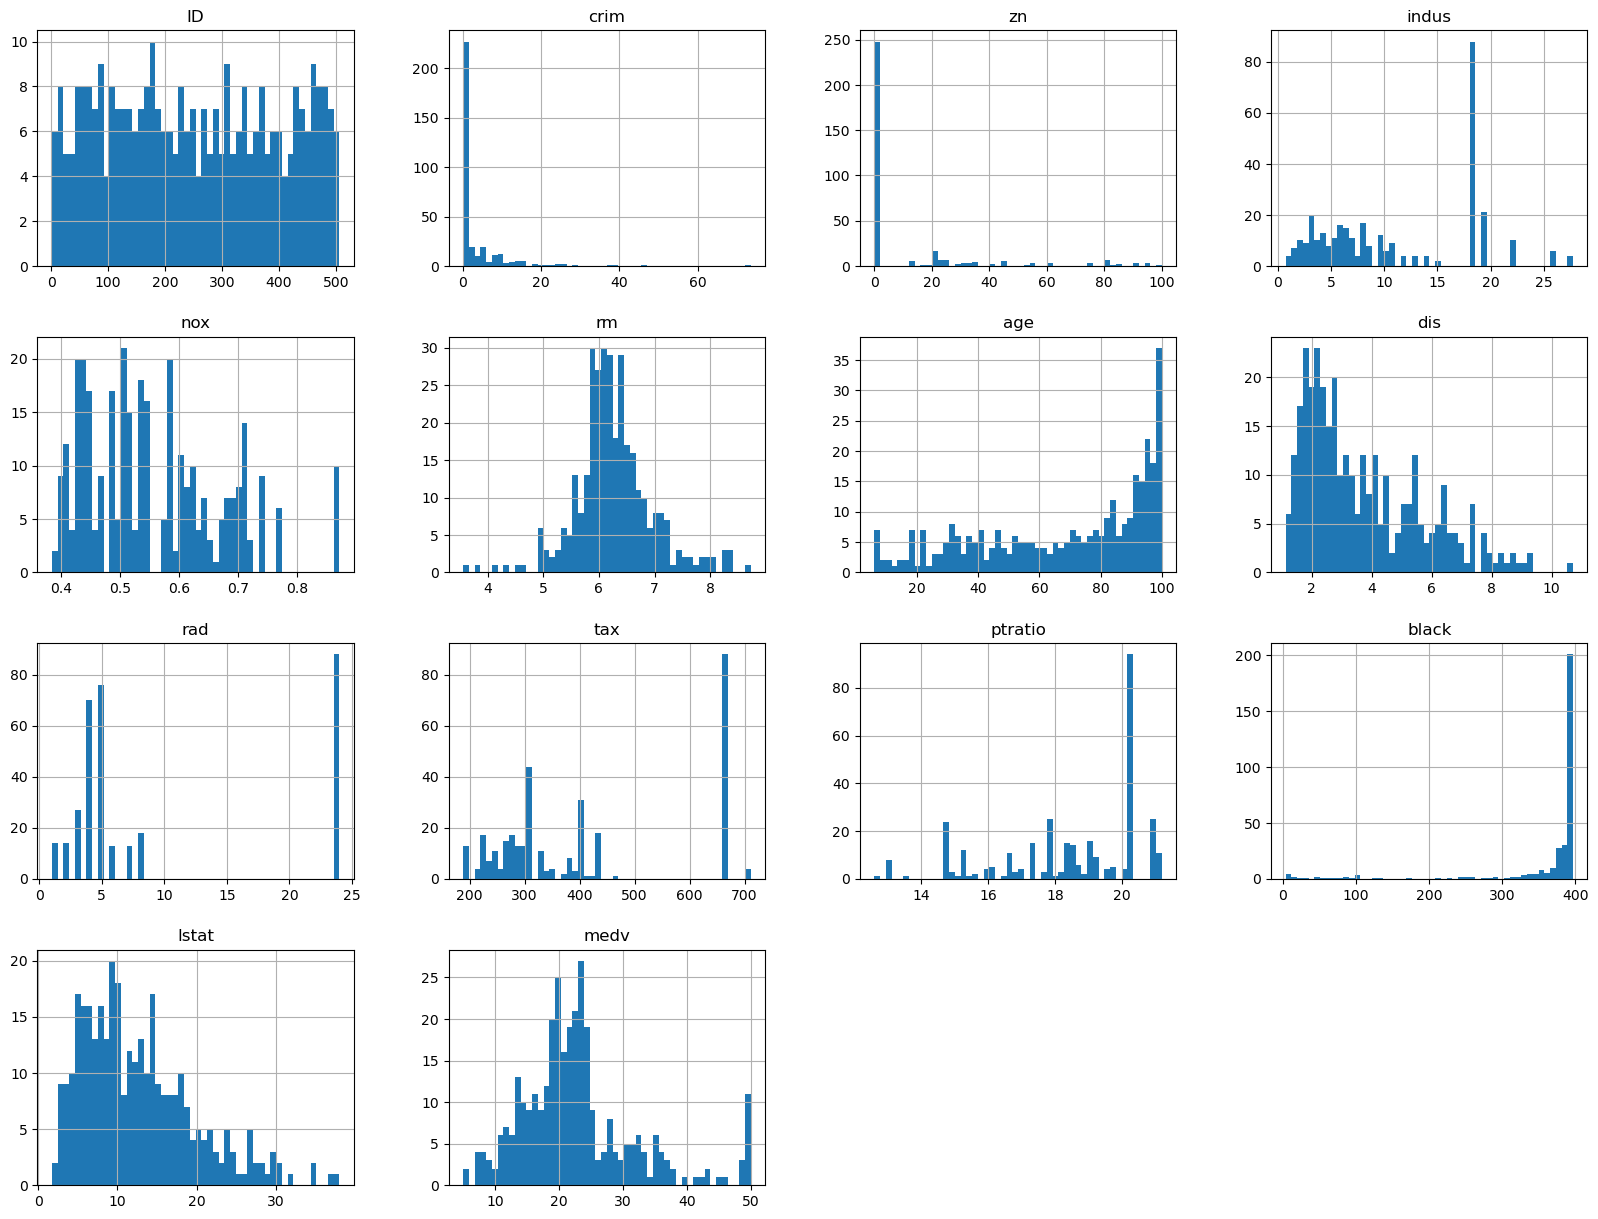

In [21]:
# Plot histograms for all columns in the DataFrame using Seaborn
df_train_.hist(bins = 50, figsize =(20,15))

In [22]:
#Standardization or scaling datta
#scaler=StandardScaler()
scaler=MinMaxScaler()
df_train_=pd.DataFrame(scaler.fit_transform(df_train_), columns=df_train_.columns)

## 2. regression modelling

### 2.1 Linear regression

In [23]:
#create regression model
reg=linear_model.LinearRegression()

In [24]:
y_train=df_train_['medv']
x_train=df_train_.drop(['medv','ID'], axis=1)

In [25]:
x_train.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.180,0.058148,0.314815,0.583656,0.629787,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680
1,0.000285,0.000,0.234444,0.172840,0.553834,0.775532,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470
2,0.000354,0.000,0.053333,0.150206,0.665569,0.423404,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389
3,0.000853,0.000,0.053333,0.150206,0.694423,0.512766,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338
4,0.001115,0.125,0.264074,0.286008,0.474632,0.644681,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254


In [27]:
#train the model
reg.fit(x_train, y_train)

LinearRegression()

In [28]:
#check the coefficients
reg.coef_

array([-0.09306104,  0.1057152 ,  0.04287919, -0.16383301,  0.44595844,
       -0.0066116 , -0.33255847,  0.18137465, -0.16529356, -0.17438483,
        0.10953484, -0.48802878])

In [29]:
#calculate RMSE on the train set
y_pred_train=reg.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (RMSE) on the train set: {rmse_train: .2f}')

Root Mean Squared Error (RMSE) on the train set:  0.11


In [30]:
#prediction and calculate RMSE on the test set

#normalizing df_test
df_test_=df_test.drop(['ID','chas'], axis=1)
df_test_=pd.DataFrame(scaler.fit_transform(df_test_), columns=df_test_.columns)

x_test=df_test_
y_test=df_sub['medv']
y_pred=reg.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse_test: .2f}')

Root Mean Squared Error (RMSE) on the test set:  22.40


#### Remark: 
there is overfitting occured, we might think of some regulation method or some feature engineering methods

### 2.2 Ridge regression (L^2): use the regularity technique, to avoid overfitting

In [31]:
# Creating a Ridge regression model and training
reg_ridge=linear_model.Ridge(alpha=0.5)
reg_ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [32]:
reg_ridge.coef_

array([-0.07816988,  0.09298653,  0.02391285, -0.13994641,  0.42311738,
       -0.00570569, -0.29345646,  0.15748181, -0.14174884, -0.17298888,
        0.10885902, -0.47059526])

In [33]:
#calculate RMSE on the train set
y_pred_train=reg_ridge.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (RMSE) on the train set: {rmse_train: .2f}')

Root Mean Squared Error (RMSE) on the train set:  0.11


In [34]:
y_pred=reg_ridge.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse_test: .2f}')

Root Mean Squared Error (RMSE) on the test set:  22.40


#### Remark: seems that Ridge regulation does not help much! We can try feature engineering or try with more advanced regression models!

In [35]:
len(df_train)

333

In [36]:
len(df_test)

173

### 2.3 removing features with low variance

In [37]:
df_train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [38]:
x_train.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.180,0.058148,0.314815,0.583656,0.629787,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680
1,0.000285,0.000,0.234444,0.172840,0.553834,0.775532,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470
2,0.000354,0.000,0.053333,0.150206,0.665569,0.423404,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389
3,0.000853,0.000,0.053333,0.150206,0.694423,0.512766,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338
4,0.001115,0.125,0.264074,0.286008,0.474632,0.644681,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254


In [39]:
x_train=x_train.drop(['nox','rm', 'dis'], axis=1) # based on heatmap and low variance

In [41]:
#create model and train it
reg=linear_model.LinearRegression()
reg.fit(x_train, y_train)
#calculate RMSE on the train set
y_pred_train=reg.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (RMSE) on the train set: {rmse_train: .2f}')

Root Mean Squared Error (RMSE) on the train set:  0.12


In [42]:
y_pred=reg_ridge.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse_test: .2f}')

Root Mean Squared Error (RMSE) on the test set:  22.40


In [43]:
reg.coef_

array([-0.06135859,  0.08174017,  0.0501653 ,  0.11278629,  0.22200452,
       -0.23009475, -0.20460311,  0.09503973, -0.72444826])

In [44]:
#Ridge regression
reg_ridge=linear_model.Ridge(alpha=0.5)
reg_ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [45]:
#calculate RMSE on the train set
y_pred_train=reg_ridge.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (RMSE) on the train set: {rmse_train: .2f}')

Root Mean Squared Error (RMSE) on the train set:  0.12


In [46]:
#prediction and calculate RMSE on the test set

#normalizing df_test
df_test_=df_test.drop(['ID','chas','nox','rm', 'dis'], axis=1)
df_test_=pd.DataFrame(scaler.fit_transform(df_test_), columns=df_test_.columns)

x_test=df_test_
y_test=df_sub['medv']
y_pred=reg.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse_test: .2f}')

Root Mean Squared Error (RMSE) on the test set:  22.39


#### Remark: 
seems that feature selection does not make an improvement.

### 2.4 Random forest

In [47]:
#select the 'chas' to run Random forest
y_train=df_train['medv']
x_train=df_train.drop(['medv','ID'], axis=1)
rf_reg=RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [48]:
#calculate RMSE on the train set
y_pred_train=rf_reg.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (RMSE) on the train set: {rmse_train: .2f}')

Root Mean Squared Error (RMSE) on the train set:  1.28


In [49]:
#prediction and calculate RMSE on the test set

#normalizing df_test
df_test_=df_test.drop(['ID'], axis=1)
df_test_=pd.DataFrame(scaler.fit_transform(df_test_), columns=df_test_.columns)

x_test=df_test_
y_test=df_sub['medv']
y_pred=rf_reg.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse_test: .2f}')

Root Mean Squared Error (RMSE) on the test set:  20.55


#### Parameter finetuning for Random forest using gridSearch

In [50]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
# Creating a GridSearchCV object for hyperparameter tuning with RandomForestRegressor
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use multiple CPU cores for faster search
)

# Fitting the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)
# Retrieving the best hyperparameters from the grid search
best_params = grid_search.best_params_

In [52]:
# Creating the final RandomForestRegressor model with the best hyperparameters
final_model = RandomForestRegressor(**best_params)
#training
final_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200)

In [53]:
#calculate RMSE on the train set
y_pred_train=final_model.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (RMSE) on the train set: {rmse_train: .2f}')

Root Mean Squared Error (RMSE) on the train set:  1.97


In [54]:
#prediction and calculate RMSE on the test set

y_pred=final_model.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse_test: .2f}')

Root Mean Squared Error (RMSE) on the test set:  18.15


#### Remark: 
seems that RF cannot improve much. Let's check again the dataset, maybe we should remove some outliers.

In [55]:
len(df_train[df_train['medv']>45])

15

In [56]:
df_train[df_train['medv']>45]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
109,162,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
110,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
113,167,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
130,187,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
141,204,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
142,205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
154,226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
160,234,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
176,263,0.52014,20.0,3.97,0,0.6470,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8
188,283,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01,46.0


In [58]:
#remove the ones with price higher than 45000$
removed=df_train[df_train['medv']>45]

In [59]:
df_train_ = df_train[df_train['medv'] <= 45]

In [60]:
#select the 'chas' to run Random forest
y_train=df_train_['medv']
x_train=df_train_.drop(['medv','ID'], axis=1)
rf_reg=RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [61]:
#calculate RMSE on the train set
y_pred_train=rf_reg.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (RMSE) on the train set: {rmse_train: .2f}')

Root Mean Squared Error (RMSE) on the train set:  1.07


In [62]:
#prediction and calculate RMSE on the test set

#normalizing df_test
df_test_=df_test.drop(['ID'], axis=1)
df_test_=pd.DataFrame(scaler.fit_transform(df_test_), columns=df_test_.columns)

x_test=df_test_
y_test=df_sub['medv']
y_pred=rf_reg.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse_test: .2f}')

Root Mean Squared Error (RMSE) on the test set:  5.13


#### Remark:
The RMSE on test set is already improved after removing outliers from the target variable. Let's try to finetune RF hyperparameters.

#### finetuning RF 

In [63]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use multiple CPU cores for faster search
)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_


final_model = RandomForestRegressor(**best_params)
final_model.fit(x_train, y_train)



RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200)

In [64]:
#calculate RMSE on the train set
y_pred_train=final_model.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (RMSE) on the train set: {rmse_train: .2f}')

#prediction and calculate RMSE on the test set

y_pred=final_model.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse_test: .2f}')

Root Mean Squared Error (RMSE) on the train set:  1.20
Root Mean Squared Error (RMSE) on the test set:  6.29


### run LR with removing outliers
Now we want to apply the ideas of removing outliers of the house price for running Linear Regression. Remember that one of the conditions for LR is that the target value has to be normally distributed.

In [65]:
#create LR model and train
reg=linear_model.LinearRegression()
reg.fit(x_train, y_train)
#calculate RMSE on the train set
y_pred_train=reg.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (RMSE) on the train set: {rmse_train: .2f}')

y_pred=reg.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse_test: .2f}')

Root Mean Squared Error (RMSE) on the train set:  3.48
Root Mean Squared Error (RMSE) on the test set:  6.67


In [66]:
# create Ridge LR
reg_ridge=linear_model.Ridge(alpha=0.5)
reg_ridge.fit(x_train, y_train)

#calculate RMSE on the train set
y_pred_train=reg_ridge.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (RMSE) on the train set: {rmse_train: .2f}')

y_pred=reg_ridge.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse_test: .2f}')

Root Mean Squared Error (RMSE) on the train set:  3.48
Root Mean Squared Error (RMSE) on the test set:  5.59


### Remarks: 
* It is very interesting that after using removing outliers technique, LR and RF works much better. Specifically, LR can even works better than RF and the Ridge LR outputs a better results than LR. However we have to bear in mind that RFs can give different results from different running based on its random nature. 

Now we check one more tree-based model: Gradient Boosting

### Gradient boosting


In [68]:
#select the all features including 'chas' 
y_train=df_train_['medv']
x_train=df_train_.drop(['medv','ID'], axis=1)


In [70]:
#create Gradient Boosting modek
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
#train it
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [71]:
#calculate RMSE on the train set
y_pred_train=gbr.predict(x_train)
rmse_train=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error (RMSE) on the train set: {rmse_train: .2f}')

y_pred=gbr.predict(x_test)
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on the test set: {rmse_test: .2f}')

Root Mean Squared Error (RMSE) on the train set:  1.00
Root Mean Squared Error (RMSE) on the test set:  8.31
